In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (8, 8)

# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False
# 디자인 설정
plt.style.use('fivethirtyeight')

In [4]:
path = r'C:\Users\owner\Desktop\study\4-1 전공수업\금융공학\금공중간 과제\IFE_P1\dataset.xlsx'
rtn_df = pd.read_excel(path)
rtn_df.set_index('Date',inplace=True)
rtn_df.head()

,SAMSUNG ELECTRONICS,HYUNDAI MOTOR,LG CHEM,NAVER,CELLTRION,LG HHLD.& HLTH.CARE,POSCO,SK TELECOM,AMOREPACIFIC,KB FINANCIAL GROUP,KOSPI,NASDAQ,SOX,KOR10Y
Date,,,,,,,,,,,,,,
2010-01-01,-0.023946,-0.055929,-0.122218,-0.093723,0.051464,-0.024349,-0.129325,0.082550,-0.142442,-0.165380,-0.048290,-0.066241,-0.141245,-0.011173
2010-02-01,-0.052368,0.000000,0.057432,0.048106,0.121623,-0.038874,0.000000,-0.053609,-0.026433,-0.050986,-0.005809,0.037532,0.065582,-0.040120
2010-03-01,0.072229,-0.008621,0.107442,-0.030092,0.092295,0.088064,-0.011300,-0.002878,0.054945,0.108214,0.048671,0.064844,0.070725,-0.037740
2010-04-01,0.027464,0.179406,0.171078,0.024555,0.084289,0.009950,-0.060271,-0.014430,0.018062,0.000000,0.026922,0.020321,0.016786,-0.022519
2010-05-01,-0.085184,0.025318,-0.028883,-0.061310,-0.013975,0.044879,-0.054625,-0.059365,0.084141,-0.100277,-0.055941,-0.091103,-0.061236,0.022519


In [5]:
stocks = rtn_df.columns[:-4] #10개 주식
markets = rtn_df.columns[-4:-1] #market port 
risk_free = rtn_df.columns[-1] #risk-free

In [6]:
#filtering
markets_df = rtn_df[markets]
stocks_df = rtn_df[stocks]
rf_df = pd.DataFrame(rtn_df[risk_free])

In [7]:
covmat = stocks_df.cov()
covmat

,SAMSUNG ELECTRONICS,HYUNDAI MOTOR,LG CHEM,NAVER,CELLTRION,LG HHLD.& HLTH.CARE,POSCO,SK TELECOM,AMOREPACIFIC,KB FINANCIAL GROUP
SAMSUNG ELECTRONICS,0.004475,0.001359,0.001188,0.001508,-0.001110,0.001545,0.001221,0.000252,0.000360,0.001919
HYUNDAI MOTOR,0.001359,0.005518,0.002337,0.000647,0.000573,0.000879,0.001104,0.000505,0.001365,0.001801
LG CHEM,0.001188,0.002337,0.008526,0.001655,0.003212,0.000300,0.002119,0.000837,0.001891,0.002669
NAVER,0.001508,0.000647,0.001655,0.006624,0.000667,0.001674,0.000706,0.000535,0.001974,0.001479
CELLTRION,-0.001110,0.000573,0.003212,0.000667,0.019687,0.001567,0.000987,-0.000532,0.004034,0.001611
LG HHLD.& HLTH.CARE,0.001545,0.000879,0.000300,0.001674,0.001567,0.006238,0.000211,-0.000315,0.003781,0.001106
POSCO,0.001221,0.001104,0.002119,0.000706,0.000987,0.000211,0.004438,0.000576,0.000221,0.002565
SK TELECOM,0.000252,0.000505,0.000837,0.000535,-0.000532,-0.000315,0.000576,0.002679,0.000035,0.000682
AMOREPACIFIC,0.000360,0.001365,0.001891,0.001974,0.004034,0.003781,0.000221,0.000035,0.010508,0.001184
KB FINANCIAL GROUP,0.001919,0.001801,0.002669,0.001479,0.001611,0.001106,0.002565,0.000682,0.001184,0.004715


# Plot the mean-variance set on ¯ r−σ plane with each stocks when short-selling is allowed. 

In [182]:
stocks_df.head()

,SAMSUNG ELECTRONICS,HYUNDAI MOTOR,LG CHEM,NAVER,CELLTRION,LG HHLD.& HLTH.CARE,POSCO,SK TELECOM,AMOREPACIFIC,KB FINANCIAL GROUP
Date,,,,,,,,,,
2010-01-01,-0.023946,-0.055929,-0.122218,-0.093723,0.051464,-0.024349,-0.129325,0.082550,-0.142442,-0.165380
2010-02-01,-0.052368,0.000000,0.057432,0.048106,0.121623,-0.038874,0.000000,-0.053609,-0.026433,-0.050986
2010-03-01,0.072229,-0.008621,0.107442,-0.030092,0.092295,0.088064,-0.011300,-0.002878,0.054945,0.108214
2010-04-01,0.027464,0.179406,0.171078,0.024555,0.084289,0.009950,-0.060271,-0.014430,0.018062,0.000000
2010-05-01,-0.085184,0.025318,-0.028883,-0.061310,-0.013975,0.044879,-0.054625,-0.059365,0.084141,-0.100277


In [38]:
np.random.seed(42)
num_ports = 6000
all_weights_short = np.zeros((num_ports, len(stocks_df.columns)))
ret_arr_short = np.zeros(num_ports)
vol_arr_short = np.zeros(num_ports)
sharpe_arr_short = np.zeros(num_ports)

for i in range(num_ports):
    # Weights
    number =  len(stocks_df.columns)
    weights = np.array(np.random.rand(number)-0.5)
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights_short[i,:] = weights
    
    # Expected return
    ret_arr_short[i] = np.sum( (stocks_df.mean() * weights ))
    
    # Expected volatility
    vol_arr_short[i] = np.sqrt(np.dot(weights.T, np.dot(stocks_df.cov(), weights)))
    
    # Sharpe Ratio
    sharpe_arr_short[i] = ret_arr_short[i]/vol_arr_short[i]

In [39]:
print('min std in the array : {}'.format(vol_arr_short.min()))
print('Its location in the array : {}'.format(vol_arr_short.argmin()))

min std in the array : 0.0387508892065673
Its location in the array : 5417


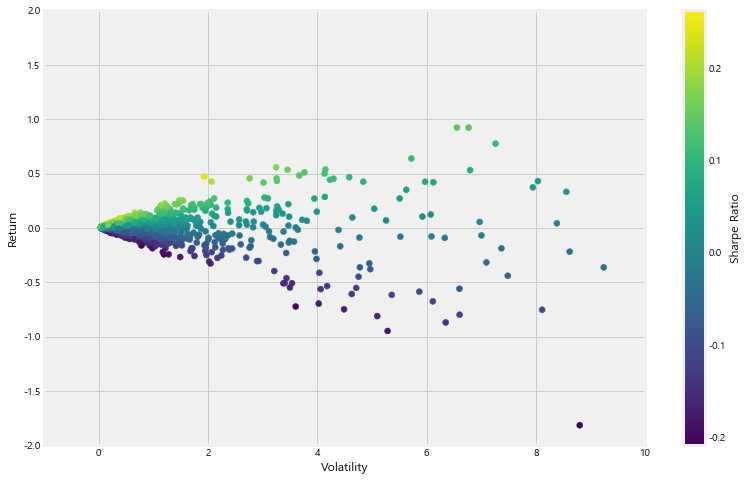

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr_short, ret_arr_short, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.xlim((-1,10))
plt.ylim((-2,2))
plt.ylabel('Return')
plt.show()

# Plot the eﬃcient frontier when short-selling is not allowed.

In [40]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(stocks_df.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for i in range(num_ports):
    # Weights
    number =  len(stocks_df.columns)
    weights = np.array(np.random.randint(0,100,number)) # weight >= 0 
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[i,:] = weights
    
    # Expected return
    ret_arr[i] = np.sum( (stocks_df.mean() * weights))
    
    # Expected volatility
    vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(stocks_df.cov(), weights)))
    
    # Sharpe Ratio
    sharpe_arr[i] = ret_arr[i]/vol_arr[i]

In [59]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(stocks_df.mean() * weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(stocks_df.cov(), weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1
def check_nonnegative(weights):
    return weights

def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1] #std

In [68]:
print('max return : {}'.format(ret_arr.max()))
print('min return : {}'.format(ret_arr.min()))

max return : 0.010583990328416107
min return : -0.0007575851747086206


In [69]:
frontier_y = np.linspace(0,0.018,200) #0<= ret_arr.max() <0.015

In [70]:
frontier_x =[]
frontier_w = []
for possible_return in frontier_y:
    # 가중치 합 = 1, 목표 수익률에 대한 총 2가지의 제약식
    cons = ({'type':'eq','fun':check_sum},
           {'type':'eq','fun':lambda x : get_ret_vol_sr(x)[0]- possible_return},
            {'type':'ineq','fun':check_nonnegative})
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds = bounds, 
                     constraints=cons)
    frontier_x.append(result['fun'])
    frontier_w.append(result['x'])

In [71]:
std_argmax = np.argmax(frontier_x)
frontier_y[std_argmax:]

array([0.01745729, 0.01754774, 0.01763819, 0.01772864, 0.0178191 ,
       0.01790955, 0.018     ])

In [72]:
frontier_x[np.argmax(frontier_x):]

[0.14031057589863952,
 0.14031057589863116,
 0.14031057589861812,
 0.14031057589863316,
 0.14031057589863372,
 0.14031057589860366,
 0.14031057589861468]

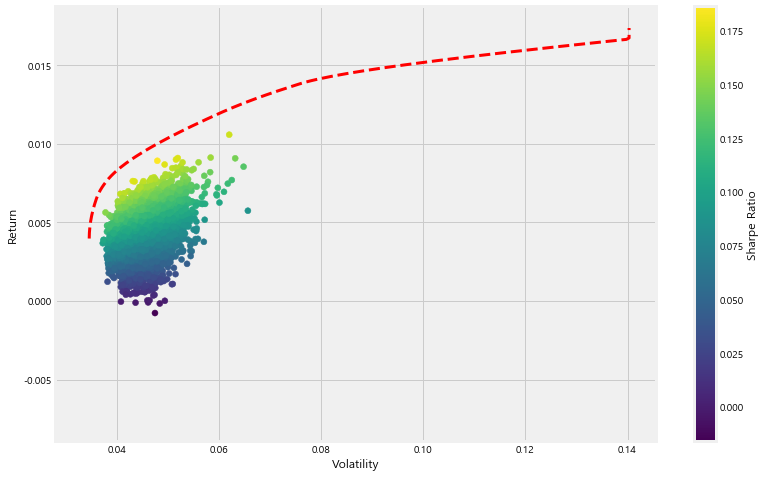

In [73]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
#plt.scatter(min_variance_point[0],min_variance_point[1],c='red', s=50) # red dot
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x[np.argmin(frontier_x):np.argmax(frontier_x)],frontier_y[np.argmin(frontier_x):np.argmax(frontier_x)], 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()

# Find the weights(wi) on each stock for minimum variance point.

In [74]:
print('max return : {}'.format(ret_arr_short.max()))
print('min return : {}'.format(ret_arr_short.min()))

max return : 15.135973323048745
min return : -97.73308002035384


In [104]:
frontier_x_short = []
frontier_w_short = []
frontier_y_short = np.linspace(-0.02,0.06,200)
for possible_return in frontier_y_short:
    # 가중치 합 = 1, 목표 수익률에 대한 총 2가지의 제약식
    cons = ({'type':'eq','fun':check_sum},
           {'type':'eq','fun':lambda x : get_ret_vol_sr(x)[0]- possible_return})
    result = minimize(minimize_volatility,init_guess,method='SLSQP', 
                     constraints=cons)
    frontier_x_short.append(result['fun'])
    frontier_w_short.append(result['x'])

In [105]:
#weights on each stock for minimum variance point when short-selling is allowed
print('1. weight on minimum variance point : {}'.format(frontier_w_short[np.argmin(frontier_x_short)]))
print('2. minimum std : {}'.format(np.min(frontier_x_short)))
print('3. return on minimum variance : {}'.format(frontier_y_short[np.argmin(frontier_x_short)]))

1. weight on minimum variance point : [ 0.14753554  0.09347761 -0.01105257  0.05846034  0.05854798  0.12219121
  0.15691078  0.40667075  0.02081415 -0.05355579]
2. minimum std : 0.03436865813841067
3. return on minimum variance : 0.0041206030150753754


In [84]:
# weights on each stock for minimum variance point when sort-selling is not allowed
print('1. weight on minimum variance point : {}'.format(frontier_w[np.argmin(frontier_x)]))
print('2. minimum std : {}'.format(np.min(frontier_x)))
print('3. return on minimum variance : {}'.format(frontier_y[np.argmin(frontier_x)]))

1. weight on minimum variance point : [1.36408232e-01 8.41623548e-02 5.31259065e-18 5.14951750e-02
 5.50545776e-02 1.22067558e-01 1.28566381e-01 4.02194435e-01
 2.00512867e-02 0.00000000e+00]
2. minimum variance : 0.034512485234301775
3. return on minimum variance : 0.003979899497487437


#  Using the sample mean of risk-free rate, ﬁnd the tangent portfolio and plot the new eﬃcient frontier.


## tangent portfolio : max sharp

In [106]:
mvp_df = pd.DataFrame({'std':frontier_x_short,'return':frontier_y_short})
mvp_df['sharp'] = (mvp_df['return'] - rf_df.mean().values[0])/mvp_df['std']

In [107]:
tangent_portfolio = mvp_df['sharp'].argmax()
tangent_portfolio_df = mvp_df.iloc[tangent_portfolio]
tangent_portfolio_df

std       0.041026
return    0.010151
sharp     0.485563
Name: 75, dtype: float64

In [120]:
weight1 = np.linspace(0,3,10)
weight2 = 1-weight1

In [121]:
rf_df.mean()

KOR10Y   -0.00977
dtype: float64

In [122]:
frontier_rtn = rf_df.mean().values[0]*weight2 + tangent_portfolio_df['return']*weight1
frontier_std = tangent_portfolio_df['std']*weight1

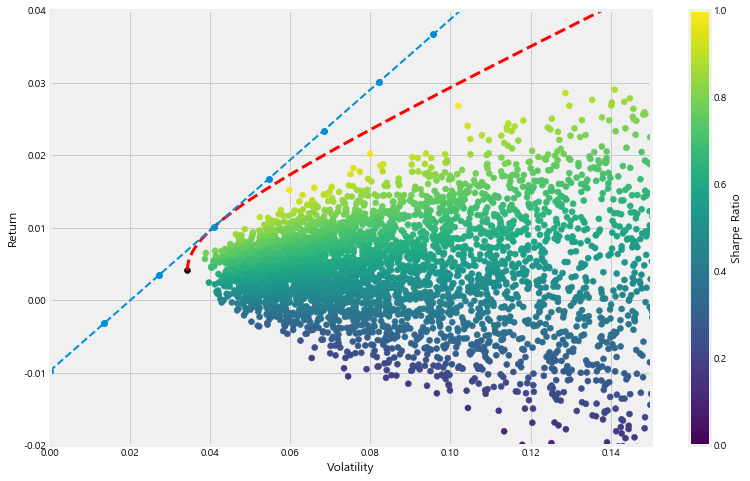

In [123]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr_short, ret_arr_short, c=sharpe_arr_short, cmap='viridis')
plt.scatter(np.min(frontier_x_short),frontier_y_short[np.argmin(frontier_x_short)],color='black')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x_short[np.argmin(frontier_x_short):],frontier_y_short[np.argmin(frontier_x_short):], 'r--', linewidth=3)
plt.plot(frontier_std,frontier_rtn,'o--',linewidth=2)
plt.xlim((0,0.15))
plt.ylim((-0.02,0.04))
plt.show()